#### Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

#### Importamos los Datasets


In [3]:
precioVentaData=pd.read_csv('precio_venta.csv')
barriosData=pd.read_csv('barrios.csv')


In [4]:
precioVentaData.head()


,Unnamed: 0,id,antiguedad,distancia_parada_m,numero_kioscos_500m,habitaciones,precio_por_area
0,0,1,32.0,84.87882,10,2,37.9
1,1,2,19.5,306.59470,9,3,42.2
2,2,3,13.3,561.98450,5,4,47.3
3,3,4,13.3,561.98450,5,2,54.8
4,4,5,5.0,390.56840,5,5,43.1


In [5]:
barriosData.head()

,Unnamed: 0,indice_unidad,barrio
0,0,1,Graciela
1,1,2,Graciela
2,2,3,Graciela
3,3,4,Graciela
4,4,5,Graciela


Agregamos la columna barrio a nuestro dataset principal

In [ ]:
columnaBarrios=barriosData['barrio']
precioVentaData['barrio'] = 0
precioVentaData['barrio'] = columnaBarrios

In [7]:
precioVentaData.head()

,Unnamed: 0,id,antiguedad,distancia_parada_m,numero_kioscos_500m,habitaciones,precio_por_area,barrio
0,0,1,32.0,84.87882,10,2,37.9,Graciela
1,1,2,19.5,306.59470,9,3,42.2,Graciela
2,2,3,13.3,561.98450,5,4,47.3,Graciela
3,3,4,13.3,561.98450,5,2,54.8,Graciela
4,4,5,5.0,390.56840,5,5,43.1,Graciela


#### Limpieza de valores nulos
Vamos a proceder a eliminar de nuestro dataset cada fila que tenga valores nulos

In [8]:
filasTotalesPrecioVenta=len(precioVentaData)
print(f'Filas totales antes de eliminar filas de precio venta con valores nulos {filasTotalesPrecioVenta}')

Filas totales antes de eliminar filas de precio venta con valores nulos 414


In [9]:
precioVentaDataClean=precioVentaData.dropna()

In [10]:
filasTotalesPrecioVentaClean=len(precioVentaDataClean)
print(f'Filas totales antes de eliminar filas de precio venta con valores nulos {filasTotalesPrecioVentaClean}')

Filas totales antes de eliminar filas de precio venta con valores nulos 409


Despues de borrar los valores na podemos ver que teniamos solo 5 filas con al menos algun valor nulo

### Ejercicio 2

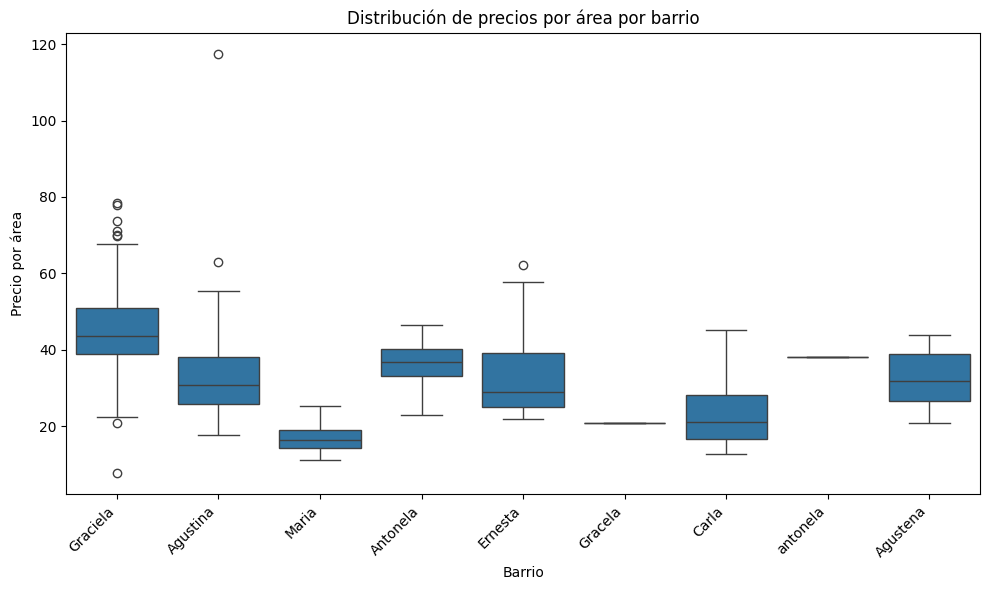

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='barrio', y='precio_por_area', data=precioVentaDataClean)
plt.title('Distribución de precios por area por barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio por area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
iqr_por_barrio = precioVentaDataClean.groupby('barrio')['precio_por_area'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print(iqr_por_barrio)

barrio
Agustena    12.500
Agustina    12.475
Antonela     7.000
Carla       11.450
Ernesta     14.000
Gracela      0.000
Graciela    12.000
Maria        4.750
antonela     0.000
Name: precio_por_area, dtype: float64


2-A La menor dispersion de precios se ve que esta en gracela y antonela tal como podemos ver en los rangos intercuantilicos

In [13]:
precio_maximo = precioVentaDataClean['precio_por_area'].max()
barrio_precio_maximo = precioVentaDataClean.loc[precioVentaDataClean['precio_por_area'] == precio_maximo, 'barrio'].iloc[0]
print(f'El barrio con el precio por área más alto es: {barrio_precio_maximo} con un precio de {precio_maximo}')

El barrio con el precio por área más alto es: Agustina con un precio de 117.5


### Ejercicio 3

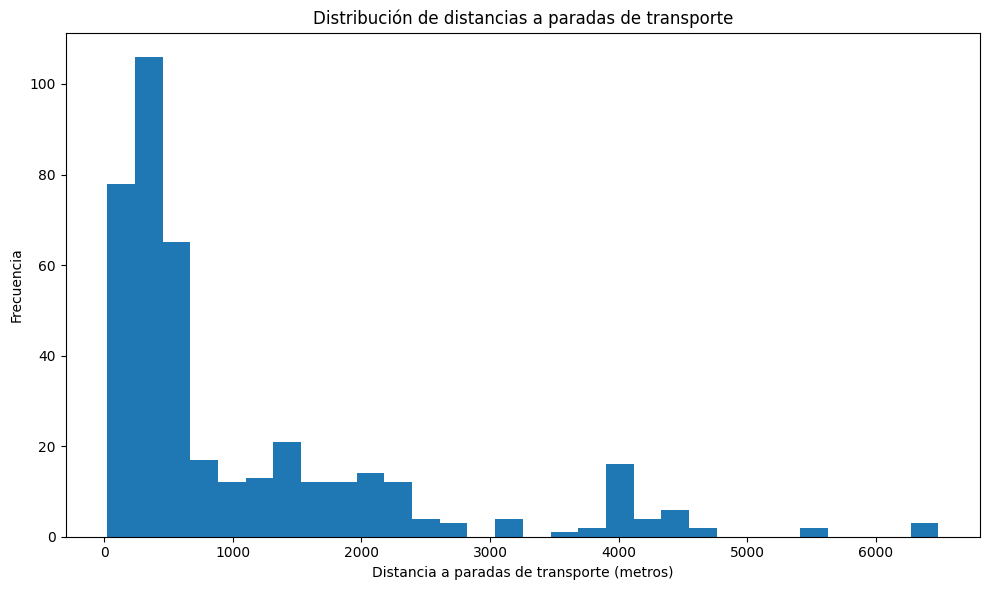

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(precioVentaDataClean['distancia_parada_m'], bins=30)

plt.xlabel('Distancia a paradas de transporte (metros)')
plt.ylabel('Frecuencia')
plt.title('Distribución de distancias a paradas de transporte')
plt.tight_layout()

plt.show()

#### Ejercicio 3 B
Para interpretar la medida de posición central vamos a usar la mediana, con la cual podemos decir que al menos un 50% de las paradas de colectivo tienen esa distancia

In [15]:
mediana_distancia_parada = precioVentaDataClean['distancia_parada_m'].median()
print(f'La mediana de las paradas de colectivo equivale a {mediana_distancia_parada:.2f} Metros')

La mediana de las paradas de colectivo equivale a 492.23 Metros


### Ejercicio 4

In [16]:
propiedades_filtradas = precioVentaDataClean[precioVentaDataClean['habitaciones'].between(2, 4)]

In [17]:
porcentaje = (len(propiedades_filtradas) / len(precioVentaDataClean)) * 100

In [ ]:
print(f'El {porcentaje:.2f}% de las propiedades tienen entre 2 y 4 habitaciones.')

El 59.66% de las propiedades tienen entre 2 y 4 habitaciones.


Como podemos ver casi un 60% de las propiedades tienen entre 2 y 4 habitaciones